### Table of Contents
- 相関係数と回帰
- 階層型クラスタリング
- 非階層型クラスタリング

数理最適化
- 2次計画問題
- 勾配降下法
- ラグランジュ未定乗数法
- ニュートン法

機械学習アルゴリズム
- 主成分分析
- 決定木
- SVM

In [ ]:
# matplotlib設定用コート
# matplotlibに描画する度に（, fontproperties=font）引数を指定する。
# なぜか設定ファイルはきかない。。。
import os
from matplotlib import pyplot as plt, font_manager

font_manager._rebuild()
font_dir = font_manager.win32FontDirectory()
font_path = os.path.join(font_dir, 'SourceHanCodeJP-Regular.otf')
font = font_manager.FontProperties(fname=font_path, size=14)

### 相関係数と回帰
- 相関係数r：2変量に散布図上で直線関係があるとしたときの、直線とデータの近さを測った値。   
したがって、2変量の相関が高いとき、回帰線を引きやすい。つまり、相関係数が1のとき、理想的な回帰線が引ける。
- 決定係数r^2: 決定係数が1または-1のとき、データ点と直線との差の二乗和も0になる。
- 単回帰：説明変数（原因）が1つの回帰問題。
- 重回帰：説明変数（原因）が複数の回帰問題。

D:\0.programs\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
D:\0.programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     48.46
Date:                Fri, 04 May 2018   Prob (F-statistic):           3.89e-05
Time:                        11:29:19   Log-Likelihood:                -75.369
No. Observations:                  12   AIC:                             154.7
Df Residuals:                      10   BIC:                             155.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -107.0571    128.673     -0.832      0.4

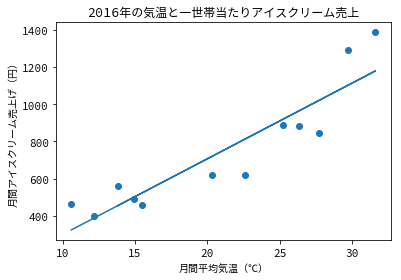

In [2]:
# -*- coding: utf-8 -*-
# リスト 3-4 アイスクリームの売上と気温から相関係数・回帰方程式を求めるプログラム例
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  # 回帰分析はstatsmodelsパッケージを利用する

# 2016年　一世帯当たりアイスクリーム支出金額　　一般社団法人日本アイスクリーム協会
# https://www.icecream.or.jp/data/expenditures.html

icecream = [[1,464],[2,397],[3,493],[4,617],[5,890],[6,883],[7,1292], \
   [8,1387],[9,843],[10,621],[11,459],[12,561]]

# 2016年　月別平均気温　気象庁　http://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?
# prec_no=44&block_no=47662&view=a2

temperature = [[1,10.6],[2,12.2],[3,14.9],[4,20.3],[5,25.2],[6,26.3], \
   [7,29.7],[8,31.6],[9,27.7],[10,22.6],[11,15.5],[12,13.8]]

x = np.array([u[1] for u in temperature])
y = np.array([u[1] for u in icecream])
X = np.column_stack((np.repeat(1, x.size), x) )
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
b, a = results.params  # statsmodelsのOLSではb, aの順で返される
print('a', a, 'b', b)
print('correlation coefficient', np.corrcoef(x, y)[0,1])
# グラフを描く
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x, y)
ax.plot(x, a*x+b)
plt.title('2016年の気温と一世帯当たりアイスクリーム売上')
plt.xlabel('月間平均気温（℃）')
plt.ylabel('月間アイスクリーム売上げ（円）')
plt.show()

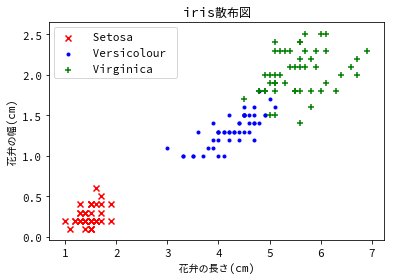

In [12]:
# -*- coding: utf-8 -*-
# リスト 3-5 iris データの散布図を描くプログラム例
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris() # irisデータを読み込む。iris.data、iris.target、iris.DESCRからなる
# print(iris.DESCR) # データの説明を表示する
species = [ ' Setosa ' , ' Versicolour ' , ' Virginica ' ]
irispddata = pd.DataFrame(iris.data, columns=iris.feature_names)
irispdtarget = pd.DataFrame(iris.target, columns=[ 'target' ])
irispd = pd.concat([irispddata, irispdtarget], axis=1)
irispd0 = irispd[irispd.target == 0]
irispd1 = irispd[irispd.target == 1]
irispd2 = irispd[irispd.target == 2]
plt.scatter(irispd0[ 'petal length (cm)' ], irispd0[ 'petal width (cm)' ], c= 'red' ,
label=species[0], marker= 'x' )
plt.scatter(irispd1[ 'petal length (cm)' ], irispd1[ 'petal width (cm)' ], c= 'blue' ,
label=species[1], marker= '.' )
plt.scatter(irispd2[ 'petal length (cm)' ], irispd2[ 'petal width (cm)' ], c= 'green' ,
label=species[2], marker= '+' )
plt.title( ' iris散布図 ' )
plt.xlabel( ' 花弁の長さ(cm) ' )
plt.ylabel( ' 花弁の幅(cm) ' )
plt.legend()
plt.show()

### 階層型クラスタリング
- 階層的なクラスタ層を機械に作らせる。
- データセットの要素数に比例して計算量が増える。

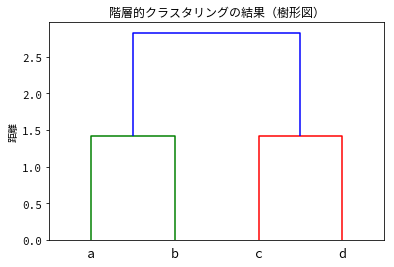

In [1]:
# -*- coding: utf-8 -*-
# リスト 3-6 SciPy パッケージを使った階層的クラスタリングのプログラム例
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
X = np.array([[1,2], [2,1], [3,4], [4,3]])
Z = linkage(X, 'single')  # Ward法を使うならば'single'の代わりに'ward'を指定する
dendrogram(
    Z,
    labels = ['a', 'b', 'c', 'd']
)
plt.title('階層的クラスタリングの結果（樹形図）')
plt.ylabel('距離')
plt.show()

### 非階層型クラスタリング
- 人が最初にグループ数を決めて、機械的にその数になるようにクラスタリングする。
- 階層型クラスタリングと比べて計算量は落ち着きやすい。

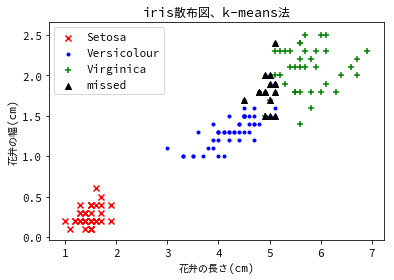

In [7]:
# -*- coding: utf-8 -*-
# リスト 3-7 iris データの k-means 法によるクラスタリングの例
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
iris = load_iris()
species = ['Setosa', 'Versicolour', 'Virginica']
irispddata = pd.DataFrame(iris.data, columns=iris.feature_names)
irispdtarget = pd.DataFrame(iris.target, columns=['target'])

kmeans = KMeans(n_clusters=3).fit(irispddata)
 
irispd = pd.concat([irispddata, irispdtarget], axis=1)
iriskmeans = pd.concat([irispd, pd.DataFrame(kmeans.labels_, \
                        columns=['kmeans'])], axis=1)
irispd0 = iriskmeans[iriskmeans.kmeans == 0]
irispd1 = iriskmeans[iriskmeans.kmeans == 1]
irispd2 = iriskmeans[iriskmeans.kmeans == 2]
 
dic = {}
dic[ iriskmeans['kmeans'][25] ] = iriskmeans['target'][25]
dic[ iriskmeans['kmeans'][75] ] = iriskmeans['target'][75]
dic[ iriskmeans['kmeans'][125] ] = iriskmeans['target'][125]
d = np.array([dic[u] for u in iriskmeans['kmeans']])
irisdiff = iriskmeans[iriskmeans.target != d ] #この書き方は参考になる。ただ、kmeansの予測結果であるdを作るならもっといい書き方があるように思う。たとえば、d = np.array(iriskmeans['kmeans'])とか
 
plt.scatter(irispd0['petal length (cm)'], irispd0['petal width (cm)'], c='red', \
            label=species[dic[0]], marker='x')
plt.scatter(irispd1['petal length (cm)'], irispd1['petal width (cm)'], c='blue', \
            label=species[dic[1]], marker='.')
plt.scatter(irispd2['petal length (cm)'], irispd2['petal width (cm)'], c='green', \
            label=species[dic[2]], marker='+')
 
plt.scatter(irisdiff['petal length (cm)'], irisdiff['petal width (cm)'], c='black', \
            label='missed', marker='^')
plt.title('iris散布図、k-means法')
plt.xlabel('花弁の長さ(cm)')
plt.ylabel('花弁の幅(cm)')
plt.legend()
plt.show()

## 数理最適化

制約式（※）の形式によってアルゴリズムを変える。

|制約式の形式|アルゴリズム（推奨）|
|:-:|:-:|
|1次式（例：Ax=b）|線形計画問題、2次計画法|
|2次式（例：$x^2+y^2-4=0$）|ラグランジュ未定乗数法|
|制約なし|勾配降下法|
※用語の意味は後述。

### 線形計画問題
ある制約のもとに目的関数を最大化あるいは最小化したいという問題を、**数理最適化問題**と呼ぶ。  
例えば、ある工場で製品Ｘ（利益3$）、Ｙ（利益4$）を製造しており、それぞれの製造に必要な原料A、B、CがＣkg（ベクトル、または行列）のとき、Ｈkgの原料で利益を最大化するにはＸ、Ｙをそれぞれどれだけ製造すればよいだろう。という問題を考える。
- 変数：上記問題における変数はＸ、Ｙ、それぞれどれだけ作るという量の単位x, yである。
- 目的関数：最適化したい関数のこと。上記例題では、利益式：3x + 4yである。
- 制約式：目的関数を制約する式のこと。

一般的に最適化問題は以下の記述の仕方がされる。  
一般式： 

||||
|:-|:-|:-|
|Minimize|Ｃx|#目的関数|  
|Subject to|Ｇx < Ｈ|#制約式①|  
|          |Ａx = ｂ|#制約式②|


また、線形計画問題とは、「目的関数」も「制約式」も両方1次式（つまり線形）の最適化問題のこと。
- ソルバ：数理最適化問題を解くシステムのこと。


In [11]:
# 線形計画問題の一般形：scipy.optimize.linprog()
# 上部で解説している一般式を計算する関数。C, G, Hは対応している。
# もしAやbが必要なら、それぞれA_eq, b_eq変数で指定する。
import numpy as np
from scipy import optimize

C = np.array([-3, -4], dtype=np.float64)
G = np.array([[1, 4], [2, 3], [2, 1]], dtype=np.float64)
H = np.array([1700, 1400, 1000], dtype=np.float64)
sol = optimize.linprog(C, A_ub=G, b_ub=H, bounds=(0, None))  #boundsは下限と上限を設定する変数。ここではNoneはなしを意味するため、0以上を表す。

print(sol.x)  #最適解
print(sol.fun)  #最適値。minimize の結果-2000ということは、Maximize 2000ということ。ややこしいけどそういうこと。

[400. 200.]
-2000.0


### 2次計画法

次のような2変数の目的関数の最大化または最小化を考える問題。（なお、制約式は線形計画問題と同じく1次式で表される）
$$f(x, y) = x^2 + xy + y^2 + 2x + 4y$$
cvxoptモジュールを利用することで、以下の標準式に当てはめる形で簡単に計算できる。  

cvxoptにおける制約条件なしの2次計画問題の標準式：
$$\frac{1}{2} \boldsymbol{x}^T\boldsymbol{P}\boldsymbol{x} + \boldsymbol{q}^T\boldsymbol{x}$$
ここで**x**が縦ベクトル、**P**, **q**は係数。  
  
次のセルでは、  

$$\boldsymbol{x} = 
\left[\begin{array}{c}
x \\
y \\
\end{array}\right] \quad
\boldsymbol{P} =
\left[\begin{array}{c}
2 & 1 \\
1 & 2 \\
\end{array}\right] \quad
\boldsymbol{q} = 
\left[\begin{array}{c}
2 \\
4 \\
\end{array}\right]
$$

の場合の問題を解くコードを記す。

In [7]:
# 目的関数のPとqを定義すればよい。ndarray型を独自の型に直す必要がある。※
import numpy as np
import cvxopt

# 目的変数を変数化
P = cvxopt.matrix(np.array([[2, 1], [1, 2]], dtype=np.float64))  #※
q = cvxopt.matrix(np.array([2, 4], dtype=np.float64))

# 計算
sol = cvxopt.solvers.qp(P, q)  #solは辞書型。答えを確認するには、以下のようにキーを指定する必要がある。

# 結果の確認
print(np.array(sol["x"]))
print(np.array(sol["primal objective"]))


#cvxoptをpipでインストールしないと動かないため、結果だけprint記載しておく。
#print('[[2.22044605e-16]\n[-2.00000000e+00]]')
#print(-4.0)

[[2.22044605e-16]
[-2.00000000e+00]]
-4.0


$Ax=b$で表される制約付きの2次計画問題は以下のように解く。

$$
Minimize \quad f(x, y) = x^2 + xy + y^2 + 2x + 4y\\
Subject　to \quad x + y = 0
$$

In [13]:
# 目的変数を変数化
P = cvxopt.matrix(np.array([[2, 1], [1, 2]], dtype=np.float64))
q = cvxopt.matrix(np.array([2, 4], dtype=np.float64))
# 制約条件を変数化
A = cvxopt.matrix(np.array([[1, 1]], dtype=np.float64))
b = cvxopt.matrix(np.array([0], dtype=np.float64))

sol = cvxopt.solvers.qp(P, q, A=A, b=b)

print(np.array(sol["x"]))
print(np.array(sol["primal objective"]))

#print('[[ 1.]\n [-1.]]')
#print(-1.0000000000000013)

[[ 1.]
 [-1.]]
-1.0000000000000013


$Gx \leqq h$で表される制約付きの2次計画問題は以下のように解く。

$$
Minimize \quad f(x, y) = x^2 + xy + y^2 + 2x + 4y\\
Subject　to \quad 2x + 3y \leqq 3
$$

In [11]:
# 目的変数を変数化
P = cvxopt.matrix(np.array([[2, 1], [1, 2]], dtype=np.float64))
q = cvxopt.matrix(np.array([2, 4], dtype=np.float64))
# 制約条件を変数化
G = cvxopt.matrix(np.array([[2, 3]], dtype=np.float64))
h = cvxopt.matrix(np.array([3], dtype=np.float64))

sol = cvxopt.solvers.qp(P, q, G=G, h=h)

print(np.array(sol["x"]))
print(np.array(sol["primal objective"]))


print(
'''
    pcost       dcost       gap    pres   dres
 0:  1.8858e+00  2.9758e-01  2e+00  0e+00  2e+00
 1: -2.1066e+00 -2.1546e+00  5e-02  2e-16  7e-01
 2: -3.9999e+00 -4.0665e+00  7e-02  6e-16  8e-17
 3: -4.0000e+00 -4.0007e+00  7e-04  9e-16  1e-16
 4: -4.0000e+00 -4.0000e+00  7e-06  3e-16  6e-17
 5: -4.0000e+00 -4.0000e+00  7e-08  3e-16  2e-16
Optimal solution found.
[[-2.45940165e-09]
 [-2.00000001e+00]]
-4.0
'''
)


    pcost       dcost       gap    pres   dres
 0:  1.8858e+00  2.9758e-01  2e+00  0e+00  2e+00
 1: -2.1066e+00 -2.1546e+00  5e-02  2e-16  7e-01
 2: -3.9999e+00 -4.0665e+00  7e-02  6e-16  8e-17
 3: -4.0000e+00 -4.0007e+00  7e-04  9e-16  1e-16
 4: -4.0000e+00 -4.0000e+00  7e-06  3e-16  6e-17
 5: -4.0000e+00 -4.0000e+00  7e-08  3e-16  2e-16
Optimal solution found.
[[-2.45940165e-09]
 [-2.00000001e+00]]
-4.0



### 勾配降下法（数理最適化）
以下のように、制約条件のない2変数の目的関数を学習率αと閾値εを用いて、以下の考え方で問題を解く。

$$
Minimize \quad f(x, y) = 5x^2 - 6xy + 3y^2 + 6x - 6y
$$
f(x, y) = kを満たす点の集合を考えると、下段のセルに出てくる図のような等高線が描ける。  
kが小さいとより中心の等高線、kが大きければより外側の等高線を構成することになる。  
一方で、fの勾配 $\nabla f = \left[\begin{array}{c}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y} \\
\end{array}\right] \quad$を考えると、  
点$(x_0, y_0)$においてはその点を通る等高線の接線に垂直方向で、kが大きくなる方向を向いたベクトルが$\nabla f(x_0, y_0)$になる。  
そのため、kを最小化する問題においては、$-\nabla f$の方向に進めば良いことになる。  
すなわち、$\boldsymbol{x}_{k+1} = \boldsymbol{x}_k - \alpha \nabla f(\boldsymbol{x}_k)$に移動するということを繰り返していけば、目的関数の値は小さくなっていく。  
なお、計算の終了条件について、極値においては、$\nabla f(x, y)=0$となるため、そのような点が見つかれば計算は終了できる。  
一般に、数値的に安全な計算をするために、$\Vert \nabla f(\boldsymbol{x}_k) \Vert \leqq \epsilon$を条件とする。

In [20]:
# 勾配降下法の実装
import numpy as np

class GradientDescent:
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f = f  #関数
        self.df = df  #導関数
        self.alpha = alpha
        self.eps = eps
        self.path = None

    def solve(self, init):
        x = init
        path = []
        grad = self.df(x)
        path.append(x)  #始点の登録。
        while (grad**2).sum() > self.eps**2:  #ここがキモ。最適化をやめる閾値計算である。
            x = x - self.alpha * grad
            grad = self.df(x)
            path.append(x)  #最適解の探索パスの追加。
        self.path_ = np.array(path)
        self.x_ = x  #最適解
        self.opt_ = self.f(x)  #最適値

[3.45722846e-07 1.00000048e+00]
-2.9999999999997073


<IPython.core.display.Javascript object>


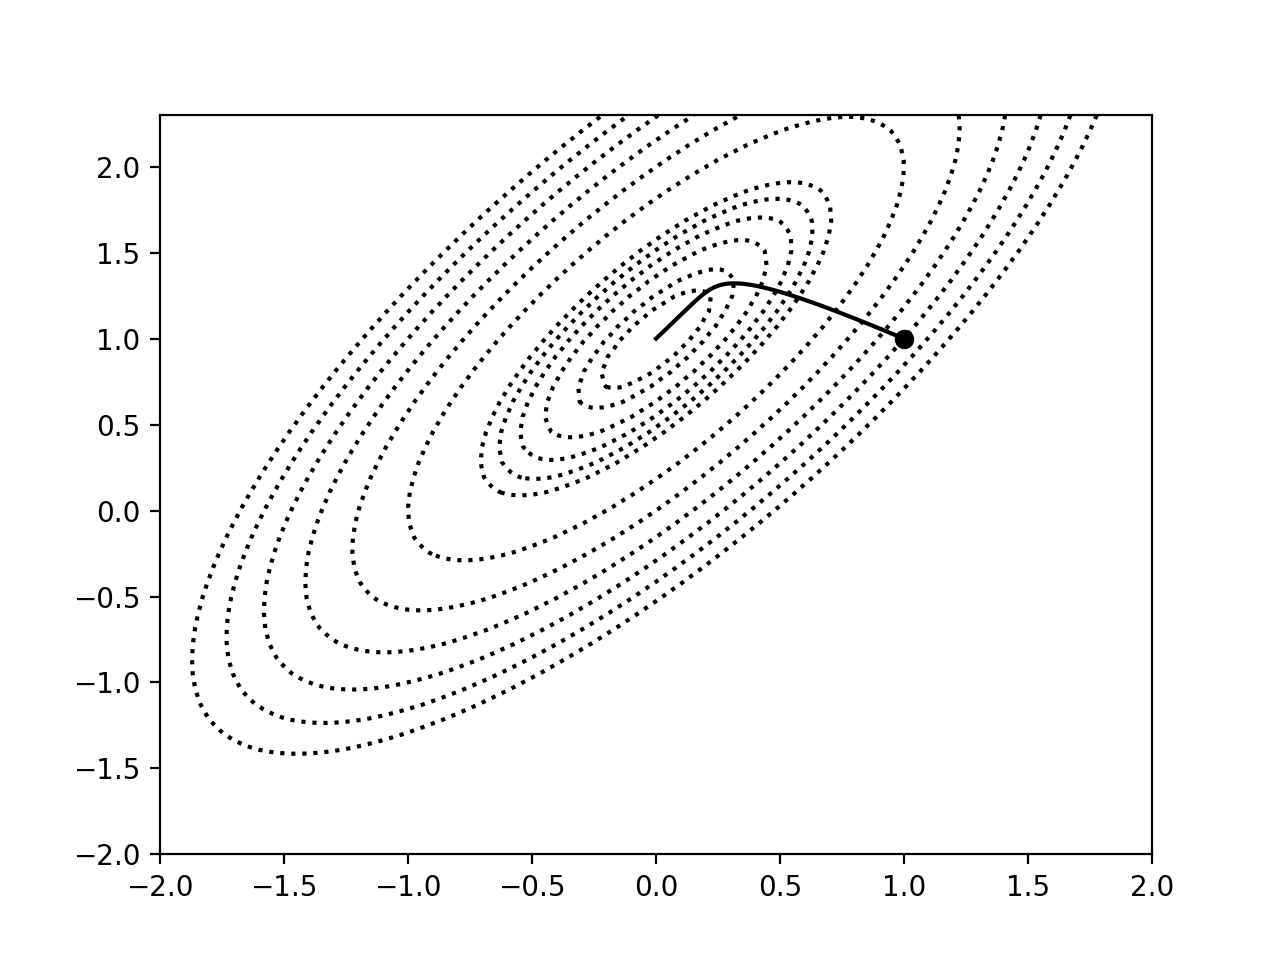

In [19]:
# 勾配降下法
import numpy as np
import matplotlib.pyplot as plt


def f(xx):
    x = xx[0]
    y = xx[1]
    return 5 * x**2 - 6 * x * y + 3 * y**2 + 6 * x - 6 * y


def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])


algo = gd.GradientDescent(f, df)
initial = np.array([1, 1])
algo.solve(initial)
print(algo.x_)  #最適解
print(algo.opt_)  #最適値

plt.scatter(initial[0], initial[1], color="k", marker="o")
plt.plot(algo.path_[:, 0], algo.path_[:, 1], color="k", linewidth=1.5)
xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 2.300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
levels = [-3, -2.9, -2.8, -2.6, -2.4,
          -2.2, -2, -1, 0, 1, 2, 3, 4]
plt.contour(xs, ys, f(xx).reshape(xmesh.shape),
            levels=levels,
            colors="k",  linestyles="dotted")

plt.show()

./Essence_of_Machine_Learning/chap04/gd.py:17: RuntimeWarning: overflow encountered in square
  while (grad**2).sum() > self.eps**2:
/Users/ikki/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
./Essence_of_Machine_Learning/chap04/gd.py:18: RuntimeWarning: invalid value encountered in subtract
  x = x - self.alpha * grad


<IPython.core.display.Javascript object>


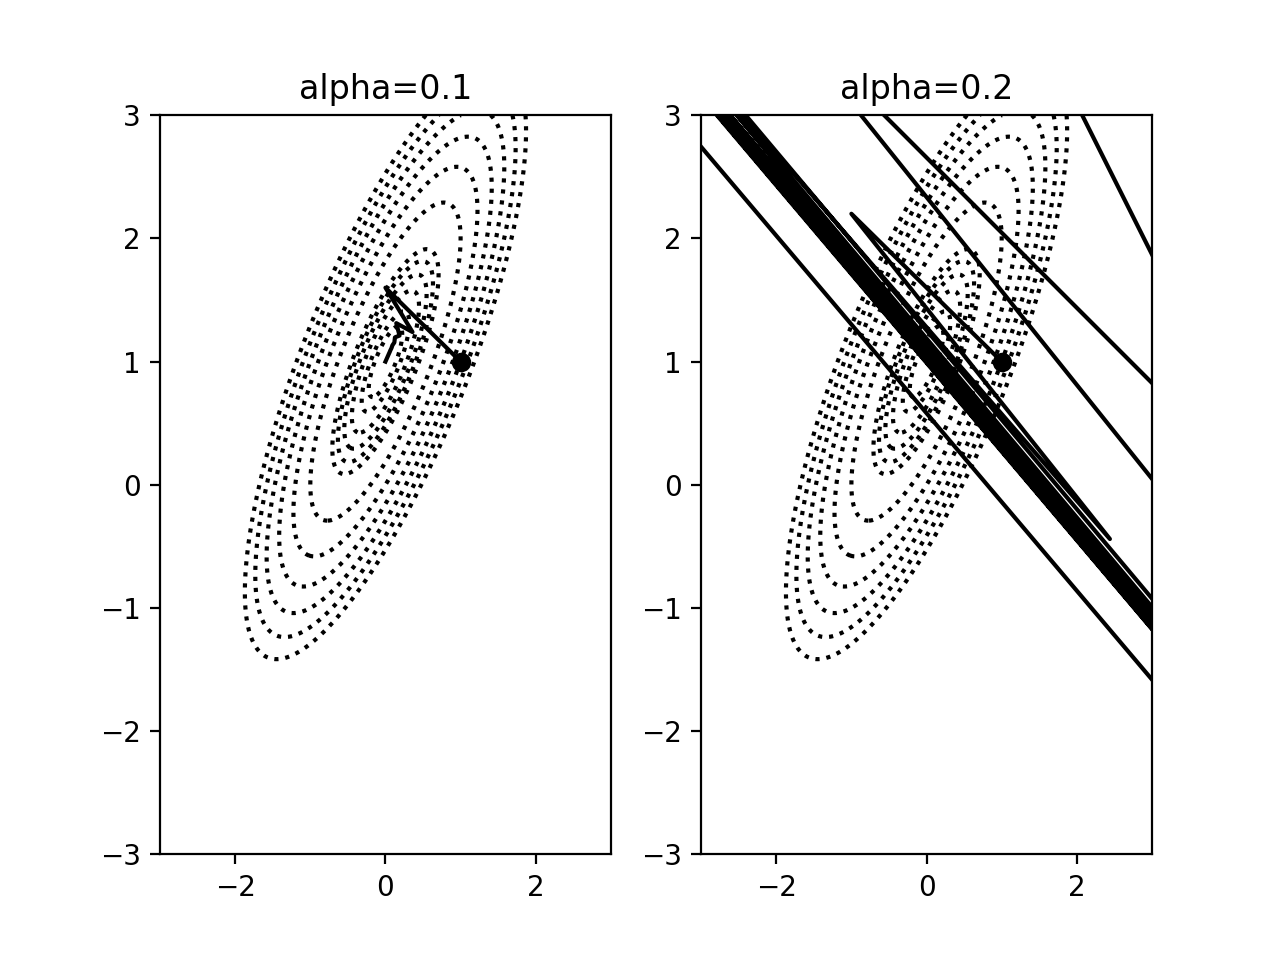

In [17]:
#　学習率αのグリッドサーチ
# 学習率が小さいほど時間がかかるが細かく探索できる。一方、学習率が大きいほど大雑把に探索できる。
import numpy as np
import matplotlib.pyplot as plt


def f(xx):
    x = xx[0]
    y = xx[1]
    return 5 * x**2 - 6 * x * y + 3 * y**2 + 6 * x - 6 * y


def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])


xmin, xmax, ymin, ymax = -3, 3, -3, 3

algos = []
initial = np.array([1, 1])
alphas = [0.1, 0.2]
for alpha in alphas:
    algo = gd.GradientDescent(f, df, alpha)
    algo.solve(np.array(initial))
    algos.append(algo)


xs = np.linspace(xmin, xmax, 300)
ys = np.linspace(ymin, ymax, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
fig, ax = plt.subplots(1, 2)
levels = [-3, -2.9, -2.8, -2.6, -2.4,
          -2.2, -2, -1, 0, 1, 2, 3, 4]
for i in range(2):
    ax[i].set_xlim((xmin, xmax))
    ax[i].set_ylim((ymin, ymax))
    ax[i].set_title("alpha={}".format(alphas[i]))
    ax[i].scatter(initial[0], initial[1], color="k", marker="o")
    ax[i].plot(algos[i].path_[:, 0], algos[i].path_[
               :, 1], color="k", linewidth=1.5)
    ax[i].contour(xs, ys, f(xx).reshape(xmesh.shape),
                  levels=levels,
                  colors="k",  linestyles="dotted")


plt.show()


### ラグランジュ未定乗数法
目的関数と2次式の制約について最適化する手法の1種。以下のような考え方をする。

$$
Minimize \quad f(x, y) = 5x^2 + 6xy + 5y^2 - 26x - 26y\\
Subject　to \quad g(x, y) = x^2 + y^2 - 4 = 0
$$

これを解くために、次のような3変数関数Ｌ(x, y, λ)（Ｌをラグランジュ関数、λをラグランジュ乗数と呼ぶ）を考える。  
$L(x, y, λ) = f(x, y) + λg(x, y) \\
\quad \quad  \quad = 5x^2 + 6xy + 5y^2 - 26x - 26y + λ(x^2 + y^2 -4)$  

そして、これを最大化すればよい。つまり、次の式を解くことで最適解が得られる。

$\nabla L(x, y, λ) = 0$

#### 直感的な考え方
$\nabla L(x, y, λ) = 0$を目指す背景。  
f(x, y)とg(x, y)はそれぞれ等高線と円と考えることができる。  
その上で、f(x, y)を最小化（または最大化）することが目的なため、それは等高線の中心に向かうことを意味する。  
同時にg(x, y)=0は、円の円周を指すことを考えると、この問題は、円周と共有点を持つ等高線のうち、できるだけ内側にあるものを見つけるということを意味する。  

これを偏微分を用いて形式化すると、$\nabla f$と$\nabla g$は等高線と円周の外側をそれぞれ向いているため、平行になるようにλを用いて表す。すなわち、  
$\nabla f = - λ\nabla g$  
これは $\left[\begin{array}{c}
\frac{\partial L}{\partial x} \\
\frac{\partial L}{\partial y} \\
\end{array}\right] = 0$である。  
また、L(x, y, λ) = f(x, y) + λg(x, y)とg(x, y)=0より $\left[\begin{array}{c}
\frac{\partial L}{\partial λ}\\
\end{array}\right] = 0 \quad$なため、  
綜合すると、$\left[\begin{array}{c}
\frac{\partial L}{\partial x} \\
\frac{\partial L}{\partial y} \\
\frac{\partial L}{\partial λ} \\
\end{array}\right] = \nabla L = 0$である。

また、上記は制約が等号制約を想定したが、制約条件が不等式の場合は、$\nabla L(x, y, λ)=0$以外に以下の条件も合わせて検討する必要がある。  

**KKT条件（カルシュ・クーン・タッカー条件）**
$$
λg(x, y) = 0 \\
λ\leq 0 \\
g(x, y) \geq 0 \\
$$

詳細は『機械学習のエッセンス』に譲るが、  
上記直感的な考え方の延長で考えると、円が最適値をすっぽり覆うことがある（λ ＝ 0つまり$\nabla f = 0$を求める）ため、  
それを考慮した条件式である。  

さらに、これまでは2変数関数の例を示してきたが、ラグランジュ未定乗数法は一般の多変数関数の場合にも応用できる。

### ニュートン法
与えられた方程式の解を数値的に探索して求める手法。  
ニュートン法では初期値$x_0$から逐次$x_1$,$x_2$...を解に近づけていく。  
y=f(x)のx=$x_k$における接線とx軸との交点を$x_{k+1}$とし、ある十分小さい値$\epsilon$について  
$|x_{k+1}-x_k| \leqq \epsilon$となったら終了する。

なお、以下では1変数のニュートン法を見るが、多変数でもニュートン法は扱える。  
ただし、前提知識としてヤコビアン行列が必要でややこしいため、ここでは参照先を示すに留める。『機械学習のエッセンス』


※  
y=f(x)のx=$x_k$における接線の傾きは$f'(x_k)$なので、ここでの接線の方程式は
$$ y = f'(x_k)(x - x_k) + f(x_k) $$
これとx軸の交点がx=$x_{k+1}$となる。x=$x_{k+1}$, y=0とおくと、次の式が得られる。
$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(f_k)} $$

In [1]:
# 実装
def newton1dim(f, df, x0, eps=1e-10, max_iter=1000):  #x0は、上の説明におけるxkを指す。つまり、初期値である。
    x = x0
    iter = 0
    while True:
        x_new = x - f(x)/df(x)  #上部※参照。
        if abs(x-x_new) < eps:
            break
        x = x_new
        iter += 1
        if iter == max_iter:
            break
    return x_new


#目的関数
def f(x):
    return x**3-5*x+1

#目的関数の導関数
def df(x):
    return 3*x**2-5


print(newton1dim(f, df, 2))
print(newton1dim(f, df, 0))
print(newton1dim(f, df, -3))

2.1284190638445777
0.20163967572340463
-2.330058739567982


## 機械学習アルゴリズム

### 主成分分析
- 回帰線：元のデータ上のばらつきがもっとも大きくなるようにベクトル軸をおくと、その軸から（垂直に）みた各データのばらつきは最小となる。このベクトル軸が主成分軸となる。
- 寄与率：主成分分析した際に得られる各主成分軸上のばらつきが元のデータ上のばらつきに占める割合
- 得られた寄与率から第2主成分の累積寄与率が97%なので、第1と第2を合わせた2次元に圧縮しても問題なさそうである。

主成分 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]
平均 [5.84333333 3.054      3.75866667 1.19866667]
分散 [4.19667516 0.24062861 0.07800042 0.02352514]
寄与率 [0.92461621 0.05301557 0.01718514 0.00518309]
累積寄与率 [0.92461621 0.97763178 0.99481691 1.        ]


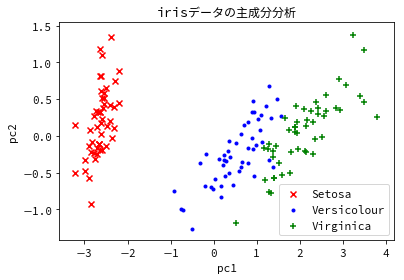

In [8]:
# -*- coding: utf-8 -*-
# リスト 3-8 iris の主成分分析のプログラム例
# 横軸が第1主成分, 縦軸が第2主成分。
# 第1主成分は元の散布図の回帰線を横軸に直した値である。
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
 
colors = ['red', 'blue', 'green' ]
markers = ['x', 'point', 'plus' ]
# データを準備する
iris = load_iris()  # scikit-learnのデータライブラリからirisを読み込む
species = ['Setosa', 'Versicolour', 'Virginica']
# データ部分を取り出す
irisdata = pd.DataFrame(iris.data, columns=iris.feature_names)
# どの種かの情報を取り出す
iristarget = pd.DataFrame(iris.target, columns=['target'])
irispd = pd.concat([irisdata, iristarget], axis=1)  # 結合する
pca = PCA(n_components = 4)       # PCAクラスのインスタンス生成、成分数を4にする
pca.fit(irisdata)                 # データ部分だけを主成分分析に与えて解析する
print('主成分', pca.components_)  # 結果を表示
print('平均', pca.mean_)
print('分散', pca.explained_variance_ )
print('寄与率', pca.explained_variance_ratio_)
print('累積寄与率', np.cumsum(pca.explained_variance_ratio_))
 
# 主成分に変換したデータ点をプロットする。表示色を変えるために種ごとに分けて処理する
transformed0 = pca.transform(irisdata[irispd.target==0])
transformed1 = pca.transform(irisdata[irispd.target==1])
transformed2 = pca.transform(irisdata[irispd.target==2])
# scatterメソッドは、xとyを位置の揃った別のリストとして受け取るので、合うように加工
plt.scatter([u[0] for u in transformed0], [u[1] for u in transformed0], c='red', \
             label=species[0], marker='x')
plt.scatter([u[0] for u in transformed1], [u[1] for u in transformed1], c='blue', \
    label=species[1], marker='.')
plt.scatter([u[0] for u in transformed2], [u[1] for u in transformed2], c='green', \
    label=species[2], marker='+')
plt.title('irisデータの主成分分析')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()
plt.show()

### 決定木
- 最も選ばれる選択：純度の高い（同じクラスの）目的変数が得られるだろう選択。
- ジニ係数：ランダムに2回データを抽出する際に純度の低い（異なるクラスの）目的変数を得る確率。    
つまり、「1-（2回とも同じクラスデータを抽出する確率）」である。
- GraphVizは魔の巣窟らしい。エラー対応について、要参照[http://own-search-and-study.xyz/2016/08/16/python3%E3%81%A7scikit-learn%E3%81%AE%E6%B1%BA%E5%AE%9A%E6%9C%A8%E3%82%92%E6%97%A5%E6%9C%AC%E8%AA%9E%E3%83%95%E3%82%A9%E3%83%B3%E3%83%88%E3%81%A7%E7%94%BB%E5%83%8F%E5%87%BA%E5%8A%9B%E3%81%99%E3%82%8B/]

In [3]:
# -*- coding: utf-8 -*-
# リスト 3-9 学生データに対する決定木の生成プログラム例
from sklearn.datasets import load_iris
from sklearn import tree
# tableは学生番号, 40歳以上か, 男性か, 70点以上かを真偽で表した
table =  [[1, False, True, True],
   [2,False, False, True],
   [3, False, True, True],
   [4, False,True, True],
   [5, True,True,True],
   [6,False, True, False],
   [7, True, False, False],
   [8,True, False, False],
   [9, True, True, False],
   [10, True, False, False]]
data = [u[1:3] for u in table]       # 説明変数（年齢, 性別）を抽出
target = [u[3] for u in table]       # 目的変数（点数）を抽出
clf = tree.DecisionTreeClassifier()  # インスタンスを生成
clf = clf.fit(data, target)          # データで学習させる
for i in range(len(data)):           # 元データを分類（予想）してみる
    # 予測値と予測した確率
    print(i+1, clf.predict( [data[i]]  ), clf.predict_proba([data[i]]))

import pydotplus                   # グラフ化するためのパッケージを読み込む
# clfをgraphvisのデータとして出力
dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)      # グラフをpdfファイルに変換
#graph.write_pdf('gakuseiDecisionTree.pdf')

1 [ True] [[0.25 0.75]]
2 [ True] [[0. 1.]]
3 [ True] [[0.25 0.75]]
4 [ True] [[0.25 0.75]]
5 [False] [[0.5 0.5]]
6 [ True] [[0.25 0.75]]
7 [False] [[1. 0.]]
8 [False] [[1. 0.]]
9 [False] [[0.5 0.5]]
10 [False] [[1. 0.]]


### SVM
各点から最も距離が離れるような線を引いて仕分けする。
うまく直線が引けない際は、非線形的に描くことも。

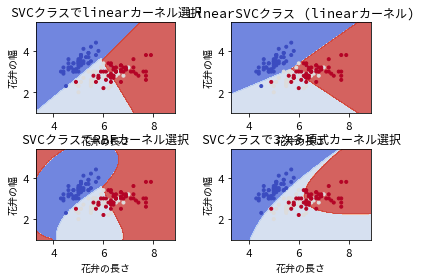

In [9]:
# -*- coding: utf-8 -*-
# リスト 3-11 iris データ（花弁の長さ・幅）を SVM で分類するプログラム例
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
iris = datasets.load_iris()
X = iris.data[:, :2]  # irisデータのうち花弁の長さと花弁の幅のみ使うことにする
y = iris.target

h = .02               # メッシュのステップサイズ
C = 1.0               # SVMのコストパラメータ（大きいほど誤分類を許さない）
svc = svm.SVC(kernel='linear', C=C).fit(X, y)               # SVCクラスでlinearを選択
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)   # SVCクラスでrbfを選択
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)  # SVCクラスでpolyを選択
lin_svc = svm.LinearSVC(C=C).fit(X, y)                     # LinearSVCクラス
 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
 
titles = ['SVCクラスでlinearカーネル選択',
          'LinearSVCクラス (linearカーネル)',
          'SVCクラスでRBFカーネル選択',
          'SVCクラスで3次多項式カーネル選択']
 
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)  # 4面作る
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # 区分ごとの色分けを等高線で描画
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # 教師データを重ねてプロット
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='.')
    plt.xlabel('花弁の長さ')
    plt.ylabel('花弁の幅')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titles[i])
plt.show()

average 25.55
variance 130.8475
std-deviation 11.438859208854701
6
7
7
13
16
19
20
22
23
28
28
30
30
32
33
35
35
38
43
46


D:\0.programs\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


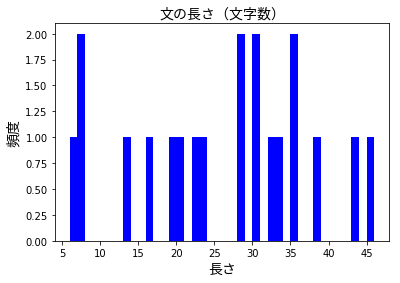

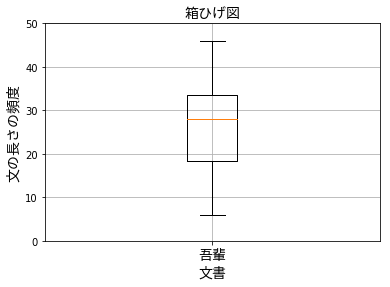

In [38]:
# -*- coding: utf-8 -*-
# リスト 3-3 『吾輩は猫である』を単語に分解し、単語数の分布のヒストグラム・箱ひげ図を描くプログラム
# なお、まったくMecabを使う理由は見当たらない。lengthlistだけで十分
from aozora import Aozora
import re
import MeCab
import numpy as np
import matplotlib.pyplot as plt
aozora = Aozora("wagahaiwa_nekodearu.txt") #Aozoraクラスのインスタンスを作る。
 
# 文に分解する
string = '\n'.join(aozora.read()) #正規表現で置換するために文字列に直す。
# string = re.sub('　', '', string) #' 'を除外する。ただ、個人的には下1行のみで十分だと思う。
string = re.split('。(?!」)|\n', re.sub('　', '', string)) #改行キーを参考にリスト化する。
while '' in string:  string.remove('')  # 空行を除く
#m = MeCab.Tagger("-Ochasen")            # MeCabで品詞分解する
 
# 先頭20文について文単位で形態素解析し、名詞だけ抽出して、基本形を文ごとのリストにする
lengthlist = np.array( [len(v) for v in string][3:23] ) #先頭20文の文字量を計算する。
print('average', lengthlist.mean())
print('variance', lengthlist.var())
print('std-deviation', lengthlist.std())
#for u in lengthlist: print(u)           # それぞれの文の長さを、出現順に表示。見づらいのでコメントアウトする。
for u in sorted(lengthlist): print(u)   # それぞれの文の長さを、長さ順に表示

#plt.rcParams['font.family'] = 'IPAGothic'
fig = plt.figure()
plt.title('文の長さ（文字数）', fontproperties=font)
plt.xlabel('長さ', fontproperties=font)
plt.ylabel('頻度', fontproperties=font)
plt.hist(lengthlist, color='blue', bins=40)  # binsでヒストグラムの横軸区分数を指定 
plt.show()

# 箱ひげ図を作る
plt.boxplot(lengthlist)
plt.xticks([1], ['吾輩'], fontproperties=font)
plt.title('箱ひげ図', fontproperties=font)
plt.grid()
plt.xlabel('文書', fontproperties=font)
plt.ylabel('文の長さの頻度', fontproperties=font)
plt.ylim([0,50])
plt.show()
